# **Demanda Electricidad**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/main/Forecasting/Demanda%20de%20electricidad/vic_elec.csv'

In [3]:
df=pd.read_csv(url,sep=',')
df.head()

,Time,Demand,Temperature,Date,Holiday
0,2011-12-31T13:00:00Z,4382.825174,21.40,2012-01-01,True
1,2011-12-31T13:30:00Z,4263.365526,21.05,2012-01-01,True
2,2011-12-31T14:00:00Z,4048.966046,20.70,2012-01-01,True
3,2011-12-31T14:30:00Z,3877.563330,20.55,2012-01-01,True
4,2011-12-31T15:00:00Z,4036.229746,20.40,2012-01-01,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         52608 non-null  object 
 1   Demand       52608 non-null  float64
 2   Temperature  52608 non-null  float64
 3   Date         52608 non-null  object 
 4   Holiday      52608 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 1.7+ MB


In [5]:
df['Time']=pd.to_datetime(df['Time'],format='%Y-%m-%dT%H:%M:%SZ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         52608 non-null  datetime64[ns]
 1   Demand       52608 non-null  float64       
 2   Temperature  52608 non-null  float64       
 3   Date         52608 non-null  object        
 4   Holiday      52608 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(1)
memory usage: 1.7+ MB


In [6]:
# Frecuencia cada 30 minutos
df=df.set_index('Time') # indice time
df=df.asfreq('30min')
df=df.sort_index()
df.head(5)

,Demand,Temperature,Date,Holiday
Time,,,,
2011-12-31 13:00:00,4382.825174,21.40,2012-01-01,True
2011-12-31 13:30:00,4263.365526,21.05,2012-01-01,True
2011-12-31 14:00:00,4048.966046,20.70,2012-01-01,True
2011-12-31 14:30:00,3877.563330,20.55,2012-01-01,True
2011-12-31 15:00:00,4036.229746,20.40,2012-01-01,True


In [7]:
# verificar si la frecuencia de la data es ta completa
(df.index== pd.date_range(start=df.index.min(),end=df.index.max(),freq=df.index.freq)).all()

True

In [8]:
print(f" Numero de filas con valores vacios :, {df.isnull().any(axis=1).mean()}")

 Numero de filas con valores vacios :, 0.0


In [9]:
df.isnull().sum()

Demand         0
Temperature    0
Date           0
Holiday        0
dtype: int64

In [10]:
df=df.drop(columns='Date')
df=df.resample(rule='H',closed='left',label='right').mean()
df.head()

,Demand,Temperature,Holiday
Time,,,
2011-12-31 14:00:00,4323.095350,21.225,1.0
2011-12-31 15:00:00,3963.264688,20.625,1.0
2011-12-31 16:00:00,3950.913495,20.325,1.0
2011-12-31 17:00:00,3627.860675,19.850,1.0
2011-12-31 18:00:00,3396.251676,19.025,1.0


In [11]:
df.shape[1]

3

In [12]:
print(f"Numero de filas es {df.shape[0]}  y columas es {df.shape[1]}" )

Numero de filas es 26304  y columas es 3


* **Demanda electrica**

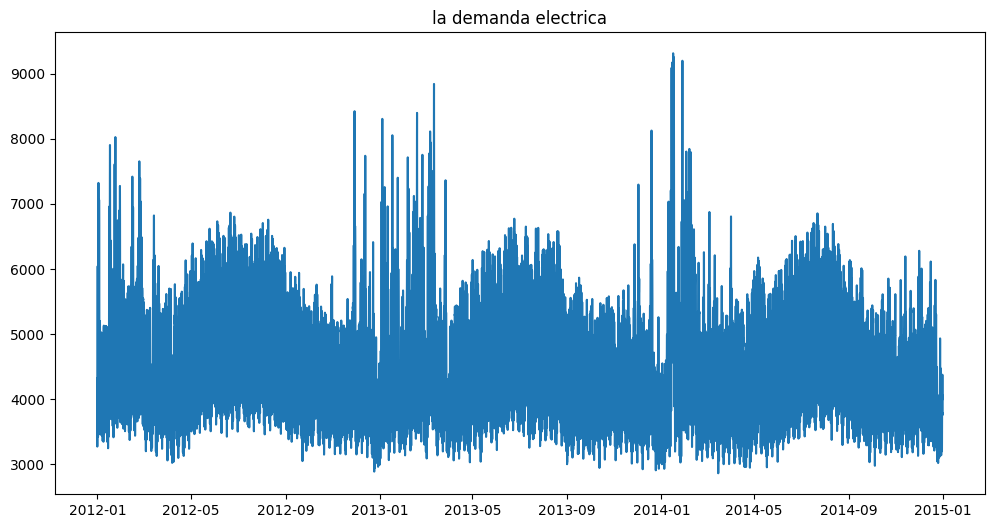

In [13]:
# Graficos de visualizacion
plt.figure(figsize=(12,6))
plt.plot(df['Demand'])
plt.title('la demanda electrica')
plt.show()

In [14]:
fig=px.line(df,y=df['Demand'],x=df.index,title='Demanda de Luz',template='plotly_dark')
fig.show()

* **Temperatura electrica**

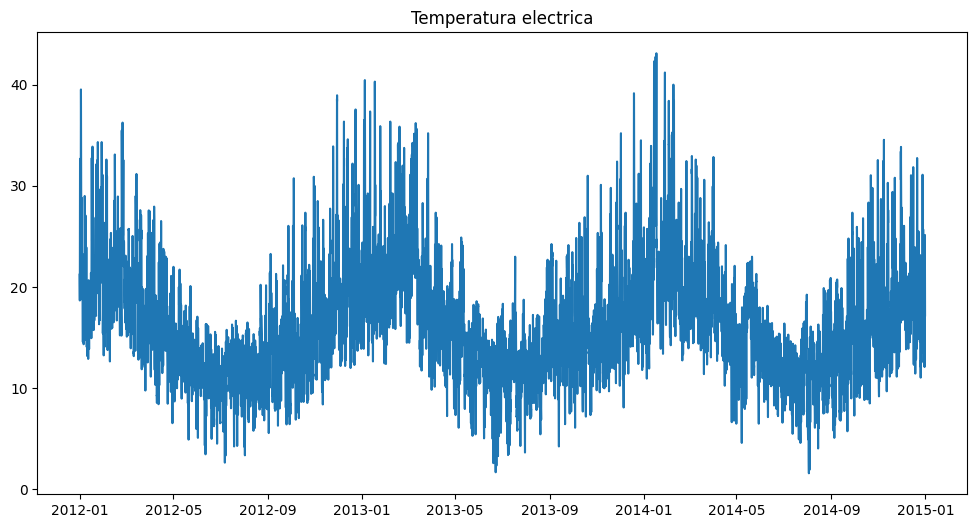

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Temperature'])
plt.title('Temperatura electrica')
plt.show()

* Tal como se evidencia en la grafica la temperatura mantiene una tendencia

In [16]:
fig=px.line(df,y=df['Temperature'],x=df.index,title='Temperatura',template='plotly_dark')
fig.show()

* **Holiday**

In [17]:
df['Holiday'].value_counts()

0.0    25560
1.0      744
Name: Holiday, dtype: int64

In [18]:
df.head()

,Demand,Temperature,Holiday
Time,,,
2011-12-31 14:00:00,4323.095350,21.225,1.0
2011-12-31 15:00:00,3963.264688,20.625,1.0
2011-12-31 16:00:00,3950.913495,20.325,1.0
2011-12-31 17:00:00,3627.860675,19.850,1.0
2011-12-31 18:00:00,3396.251676,19.025,1.0


In [19]:
df.tail()

,Demand,Temperature,Holiday
Time,,,
2014-12-31 09:00:00,4069.625550,21.60,0.0
2014-12-31 10:00:00,3909.230704,20.30,0.0
2014-12-31 11:00:00,3900.600901,19.65,0.0
2014-12-31 12:00:00,3758.236494,18.10,0.0
2014-12-31 13:00:00,3785.650720,17.20,0.0


## **Split Data**

In [20]:
# Slipt data into train  val  test
df=df.loc['2012-01-01 00:00:00': '2014-12-30 23:00:00'].copy()
end_train='2013-12-31 23:59:00'
end_validation='2014-11-30 23:59:00'
data_train=df.loc[:end_train,:].copy()
data_val=df.loc[end_train:end_validation,:].copy()
data_test=df.loc[end_validation:,:].copy()

In [21]:
print(f"Total de datos de la data de entrenamiento es {data_train.shape[0]} ")
print(f"Total de datos de la data de validacion es {data_val.shape[0]}")
print(f"Total de datos de la data de testeo es {data_test.shape[0]}")

Total de datos de la data de entrenamiento es 17544 
Total de datos de la data de validacion es 8016
Total de datos de la data de testeo es 720


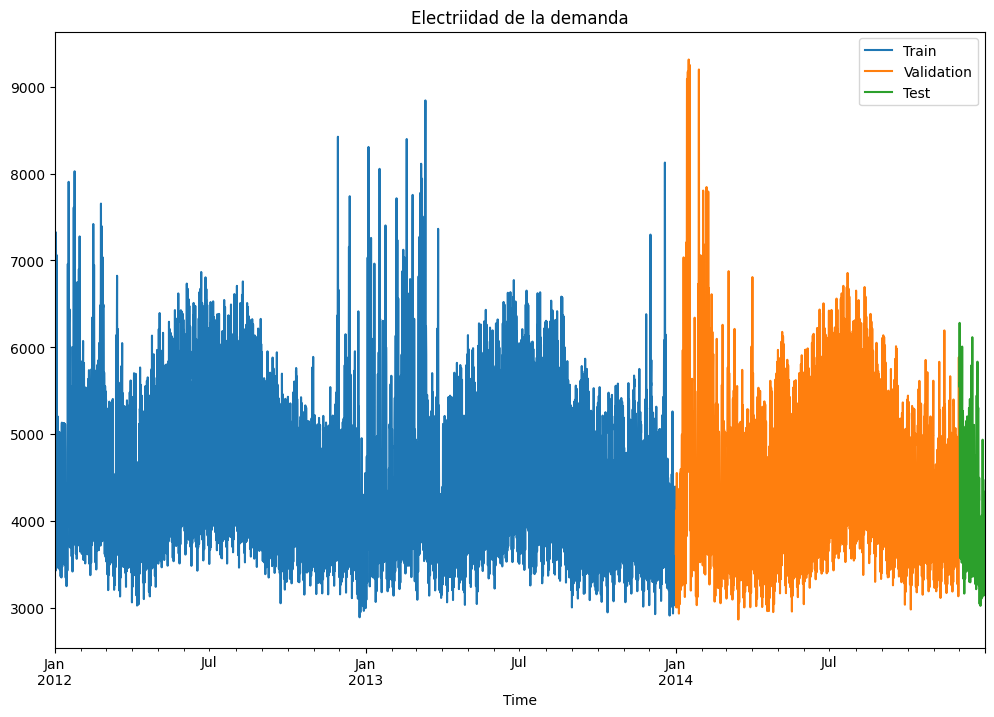

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
data_train['Demand'].plot(ax=ax,label='Train')
data_val['Demand'].plot(ax=ax,label='Validation')
data_test['Demand'].plot(ax=ax,label='Test')
ax.set_title('Electriidad de la demanda')
ax.legend()
plt.show()

## **Analisis estacionario del dia, mes y año**

* **Month (Mes)**

In [23]:
df.head()

,Demand,Temperature,Holiday
Time,,,
2012-01-01 00:00:00,4329.049863,27.000,1.0
2012-01-01 01:00:00,4685.820480,29.650,1.0
2012-01-01 02:00:00,5009.466997,31.650,1.0
2012-01-01 03:00:00,5270.116328,32.675,1.0
2012-01-01 04:00:00,5487.388289,32.300,1.0


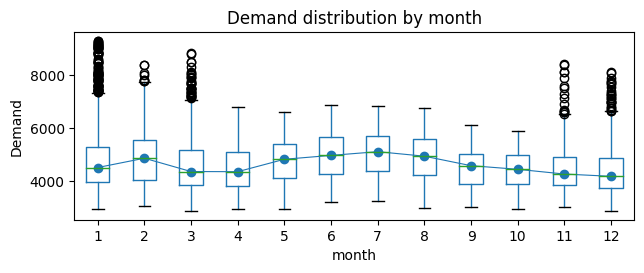

In [24]:
df['month']=df.index.month
fig, ax = plt.subplots(figsize=(7, 2.5))
df.boxplot(column='Demand', by='month', ax=ax,)
df.groupby('month')['Demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by month')
fig.suptitle('');

* Tal como se evidencia en los graficos en los meses de Enero, Febrero, Marzo, noviembre y diciembre tiene una gran cantidad de outlier. Esto se puede ver a X factores como los dias festivos como navidad, año nuevo o la temporada de vacaciones en enero y febrero.

* **Analisis de la distribucion electrica por semana.**

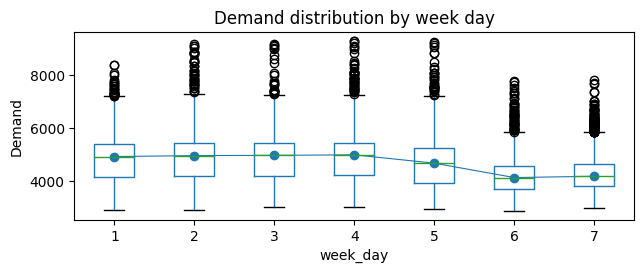

In [25]:
fig, ax = plt.subplots(figsize=(7, 2.5))
df['week_day'] = df.index.day_of_week + 1
df.boxplot(column='Demand', by='week_day', ax=ax)
df.groupby('week_day')['Demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by week day')
fig.suptitle('')
plt.show()

La estacionalidad semanal muestra menores valores de demanda durante el fin de semana.

* **Analisis de la distribucion electrica por dia durante las 24 horas**

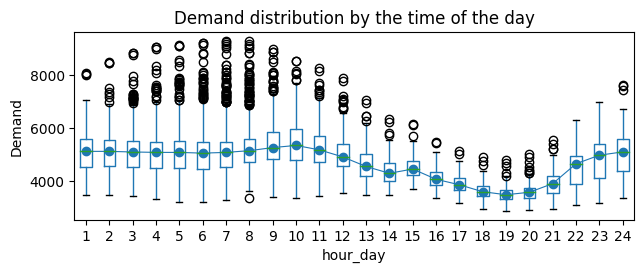

In [26]:
fig, ax = plt.subplots(figsize=(7, 2.5))
df['hour_day'] = df.index.hour + 1
df.boxplot(column='Demand', by='hour_day', ax=ax)
df.groupby('hour_day')['Demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by the time of the day')
fig.suptitle('');

Existe una estacionalidad diaria, con demanda cayendo entre las 16:00 y las 21:00 horas.

**Analisis de l¿Holidays y no Holidays**

In [27]:
df.columns

Index(['Demand', 'Temperature', 'Holiday', 'month', 'week_day', 'hour_day'], dtype='object')

In [28]:
df.head()

,Demand,Temperature,Holiday,month,week_day,hour_day
Time,,,,,,
2012-01-01 00:00:00,4329.049863,27.000,1.0,1,7,1
2012-01-01 01:00:00,4685.820480,29.650,1.0,1,7,2
2012-01-01 02:00:00,5009.466997,31.650,1.0,1,7,3
2012-01-01 03:00:00,5270.116328,32.675,1.0,1,7,4
2012-01-01 04:00:00,5487.388289,32.300,1.0,1,7,5


* **Graficos de Autocorrelacion**

In [29]:
# Librerias necesarias para las visualizacion de autocorrelaciones.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

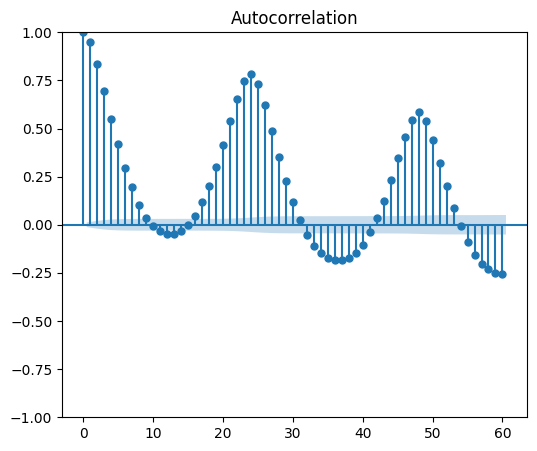

In [30]:
fig,ax=plt.subplots(figsize=(6,5))
plot_acf(df['Demand'],ax=ax,lags=60)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



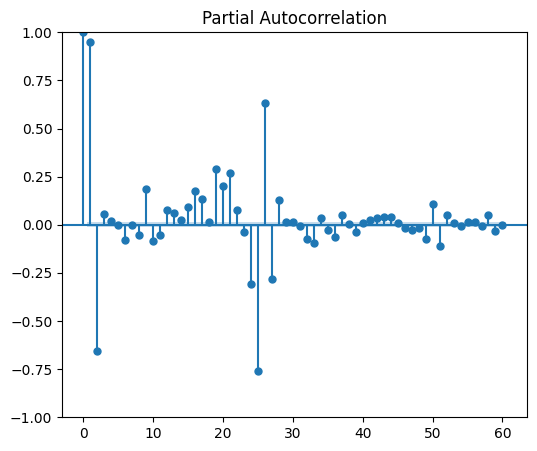

In [31]:
# Partial autocorrelation plot
fig,ax=plt.subplots(figsize=(6,5))
plot_pacf(df['Demand'],ax=ax,lags=60)
plt.show()

## **Modelling and Forecasting**

In [36]:
pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.2 MB/s eta 0:00:00


In [37]:
# Modelling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [38]:
# Train forecaste
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24,
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=df.loc[:end_validation, 'Demand'])
forecaster

ForecasterAutoreg 
Regressor: Ridge(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 24 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2014-11-30 23:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: H 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2023-07-29 23:54:17 
Last fit date: 2023-07-29 23:54:17 
Skforecast version: 0.9.1 
Python version: 3.10.6 
Forecaster id: None 

In [39]:
# Backtest
# ==============================================================================
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = df['Demand'],
                          steps              = 24,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(df.loc[:end_validation]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = True,
                          show_progress      = True
                    )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 25560
Number of observations used for backtesting: 720
    Number of folds: 30
    Number of steps per fold: 24
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2012-01-01 00:00:00 -- 2014-11-30 23:00:00  (n=25560)
    Validation: 2014-12-01 00:00:00 -- 2014-12-01 23:00:00  (n=24)
Fold: 1
    Training:   2012-01-01 00:00:00 -- 2014-11-30 23:00:00  (n=25560)
    Validation: 2014-12-02 00:00:00 -- 2014-12-02 23:00:00  (n=24)
Fold: 2
    Training:   2012-01-01 00:00:00 -- 2014-11-30 23:00:00  (n=25560)
    Validation: 2014-12-03 00:00:00 -- 2014-12-03 23:00:00  (n=24)
Fold: 3
    Training:   2012-01-01 00:00:00 -- 2014-11-30 23:00:00  (n=25560)
    Validation: 2014-12-04 00:00:00 -- 2014-12-04 23:00:00  (n=24)
Fold: 4
    Training:   2012-01-01 00:00:00 -- 2014-11-30 23:00:00  (n=25560)
    Validation: 2014-12-05

  0%|          | 0/30 [00:00<?, ?it/s]

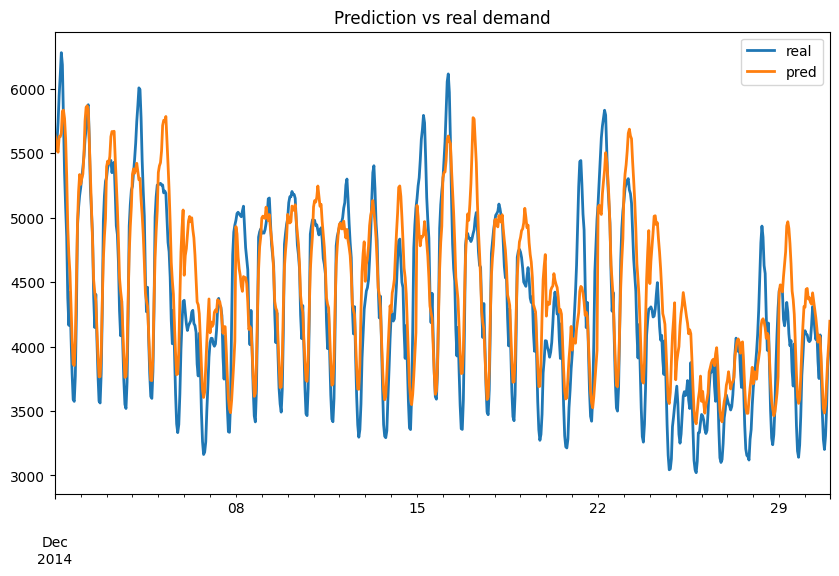

In [40]:
fig,ax=plt.subplots(figsize=(10,6))
df.loc[predictions.index,'Demand'].plot(ax=ax,linewidth=2,label='real')
predictions.plot(linewidth=2,label='prediction',ax=ax)
ax.set_title('Prediction vs real demand')
plt.legend()
plt.show()

In [42]:
print(f'Backtest error: {metric.round(2)}')

Backtest error: 289.52


In [59]:
# Hyperparameter Grid search
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

# Lags used as predictors
lags_grid = [5, 24, [1, 2, 3, 23, 24, 25, 47, 48, 49]]

# Regressor's hyperparameters
param_grid = {'alpha': np.logspace(-3, 5, 10),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
# solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = df.loc[:end_validation, 'Demand'],
                   steps              = 24,
                   metric             = 'mean_absolute_error',
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   initial_train_size = len(df[:end_train]),
                   refit              = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False,
                   show_progress      = True
               )

Number of models compared: 210.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/70 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3 23 24 25 47 48 49] 
  Parameters: {'alpha': 215.44346900318823, 'solver': 'sparse_cg'}
  Backtesting metric: 257.5522453670964



In [60]:
results_grid

,lags,params,mean_absolute_error,alpha,solver
186,"[1, 2, 3, 23, 24, 25, 47, 48, 49]","{'alpha': 215.44346900318823, 'solver': 'spars...",257.552245,215.443469,sparse_cg
183,"[1, 2, 3, 23, 24, 25, 47, 48, 49]","{'alpha': 215.44346900318823, 'solver': 'svd'}",257.843098,215.443469,svd
184,"[1, 2, 3, 23, 24, 25, 47, 48, 49]","{'alpha': 215.44346900318823, 'solver': 'chole...",257.843098,215.443469,cholesky
182,"[1, 2, 3, 23, 24, 25, 47, 48, 49]","{'alpha': 215.44346900318823, 'solver': 'auto'}",257.843098,215.443469,auto
187,"[1, 2, 3, 23, 24, 25, 47, 48, 49]","{'alpha': 215.44346900318823, 'solver': 'sag'}",257.852065,215.443469,sag
...,...,...,...,...,...
64,"[1, 2, 3, 4, 5]","{'alpha': 100000.0, 'solver': 'svd'}",681.832812,100000.000000,svd
65,"[1, 2, 3, 4, 5]","{'alpha': 100000.0, 'solver': 'cholesky'}",681.832812,100000.000000,cholesky
66,"[1, 2, 3, 4, 5]","{'alpha': 100000.0, 'solver': 'lsqr'}",681.832817,100000.000000,lsqr
67,"[1, 2, 3, 4, 5]","{'alpha': 100000.0, 'solver': 'sparse_cg'}",681.832817,100000.000000,sparse_cg


In [61]:
forecaster

ForecasterAutoreg 
Regressor: Ridge(alpha=215.44346900318823, random_state=123, solver='sparse_cg') 
Lags: [ 1  2  3 23 24 25 47 48 49] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 49 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2014-11-30 23:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: H 
Regressor parameters: {'alpha': 215.44346900318823, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'sparse_cg', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2023-07-30 00:15:20 
Last fit date: 2023-07-30 00:23:41 
Skforecast version: 0.9.1 
Python version: 3.10.6 
Forecaster id: None 

  0%|          | 0/30 [00:00<?, ?it/s]

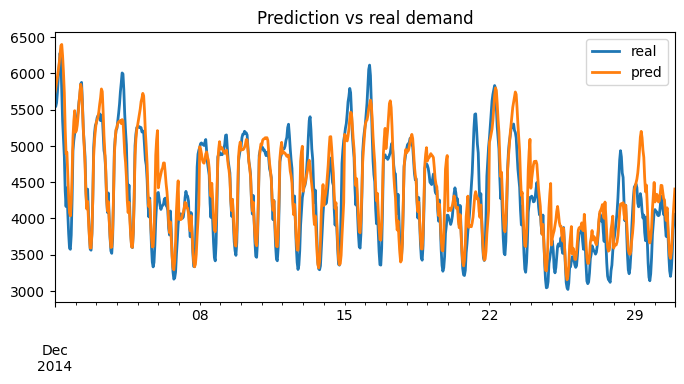

In [62]:
# Predicciones con el data_test
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = df['Demand'],
                          steps              = 24,
                          metric             = mean_absolute_error,
                          initial_train_size = len(df[:end_validation]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = True
                      )

fig, ax = plt.subplots(figsize=(8, 3.5))
df.loc[predictions.index, 'Demand'].plot(linewidth=2, label='real', ax=ax)
predictions.plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real demand')
ax.legend()
plt.show()

In [64]:
# Backtest error
print(f'Backtest error: {metric.round(2)}')

Backtest error: 251.94


* **Prediction intervals**

In [65]:
metric, predictions = backtesting_forecaster(
                          forecaster          = forecaster,
                          y                   = df['Demand'],
                          steps               = 24,
                          metric              = 'mean_absolute_error',
                          initial_train_size  = len(df.loc[:end_validation]),
                          refit               = False,
                          interval            = [10, 90],
                          n_boot              = 500,
                          in_sample_residuals = True,
                          n_jobs             = 'auto',
                          verbose             = False,
                          show_progress       = True
                      )

print('Backtesting metric:', metric)
predictions.head(5)

  0%|          | 0/30 [00:00<?, ?it/s]

Backtesting metric: 251.9448681535114


,pred,lower_bound,upper_bound
2014-12-01 00:00:00,5727.280447,5598.482858,5848.911568
2014-12-01 01:00:00,5801.891774,5598.592108,5973.716068
2014-12-01 02:00:00,5878.656079,5618.554501,6112.581751
2014-12-01 03:00:00,5951.822226,5655.223666,6237.684160
2014-12-01 04:00:00,6046.712253,5696.481786,6341.270811


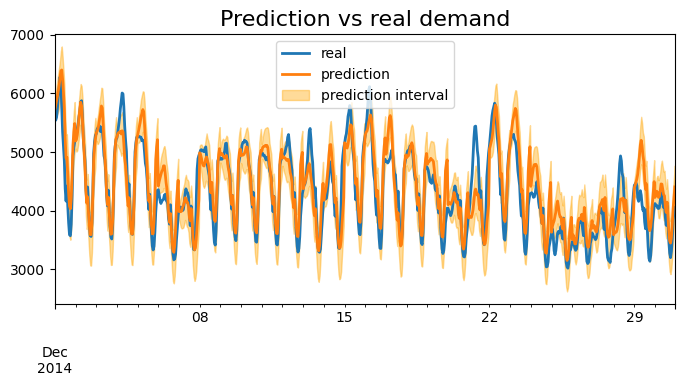

In [67]:
fig, ax = plt.subplots(figsize=(8, 3.5))
df.loc[predictions.index, 'Demand'].plot(linewidth=2, label='real', ax=ax)
predictions.iloc[:, 0].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real demand',fontsize=16)
ax.fill_between(
    predictions.index,
    predictions.iloc[:, 1],
    predictions.iloc[:, 2],
    alpha = 0.4,
    color = 'orange',
    label = 'prediction interval'
)
ax.legend()
plt.show()

In [68]:
# Intervalo de prediccion
inside_interval = np.where(
                      (df.loc[end_validation:, 'Demand'] >= predictions["lower_bound"]) & \
                      (df.loc[end_validation:, 'Demand'] <= predictions["upper_bound"]),
                      True,
                      False
                  )

coverage = inside_interval.mean()
print(f"Predicted interval coverage: {round(100*coverage, 2)} %")

Predicted interval coverage: 79.17 %


* **Anticipated daily forecast**

In [70]:
df.iloc[:len(df.loc[:end_validation])+12].tail(2)

,Demand,Temperature,Holiday,month,week_day,hour_day
Time,,,,,,
2014-12-01 10:00:00,5084.011257,19.90,0.0,12,1,11
2014-12-01 11:00:00,4851.066658,19.35,0.0,12,1,12


In [71]:
# total de 36 horas
metric, predictions = backtesting_forecaster(
                          forecaster            = forecaster,
                          y                     = df['Demand'],
                          steps                 = 24,
                          metric                = 'mean_absolute_error',
                          initial_train_size    = len(df.loc[:end_validation])+12,
                          gap                   = 12,
                          allow_incomplete_fold = True,
                          refit                 = False,
                          n_jobs                = 'auto',
                          verbose               = True,
                          show_progress         = True
                      )

print("")
print('Backtesting metric:', metric)
predictions.head(5)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 25572
Number of observations used for backtesting: 708
    Number of folds: 29
    Number of steps per fold: 24
    Number of steps to exclude from the end of each train set before test (gap): 12

Fold: 0
    Training:   2012-01-01 00:00:00 -- 2014-12-01 11:00:00  (n=25572)
    Validation: 2014-12-02 00:00:00 -- 2014-12-02 23:00:00  (n=24)
Fold: 1
    Training:   2012-01-01 00:00:00 -- 2014-12-01 11:00:00  (n=25572)
    Validation: 2014-12-03 00:00:00 -- 2014-12-03 23:00:00  (n=24)
Fold: 2
    Training:   2012-01-01 00:00:00 -- 2014-12-01 11:00:00  (n=25572)
    Validation: 2014-12-04 00:00:00 -- 2014-12-04 23:00:00  (n=24)
Fold: 3
    Training:   2012-01-01 00:00:00 -- 2014-12-01 11:00:00  (n=25572)
    Validation: 2014-12-05 00:00:00 -- 2014-12-05 23:00:00  (n=24)
Fold: 4
    Training:   2012-01-01 00:00:00 -- 2014-12-01 11:00:00  (n=25572)
    Validation: 2014-12-0

  0%|          | 0/29 [00:00<?, ?it/s]


Backtesting metric: 374.3754324435058


,pred
2014-12-02 00:00:00,5154.640810
2014-12-02 01:00:00,5183.800740
2014-12-02 02:00:00,5264.099577
2014-12-02 03:00:00,5398.395584
2014-12-02 04:00:00,5572.751736


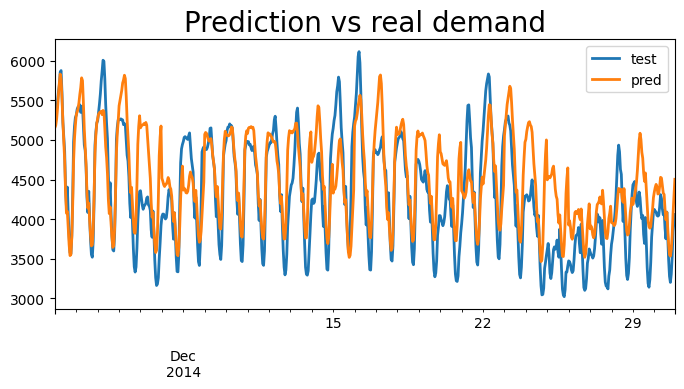

In [73]:
fig, ax = plt.subplots(figsize=(8, 3.5))
df.loc[predictions.index, 'Demand'].plot(linewidth=2, label='test', ax=ax)
predictions.plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real demand',fontsize=20)
ax.legend()
plt.show()

In [74]:
# Backtest error
# ==============================================================================
error = mean_absolute_error(
            y_true = df.loc[predictions.index, 'Demand'],
            y_pred = predictions
        )

print(f"Backtest error: {error}")

Backtest error: 374.3754324435058
